<a href="https://colab.research.google.com/github/Yomex139/Cassava-disease-dataset/blob/main/Cassava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [2]:
#downloading helper function
!wget https://github.com/Yomex139/Food-Vision/raw/main/Helper_Function.py
#importing some libraries
from Helper_Function import make_confusion_matrix,visual_tf_dataset,visualize_processed_data,preprocess_img,create_tensorboard_callback,compare_historys,load_and_prep_image,pred_and_plot

--2023-08-06 15:23:50--  https://github.com/Yomex139/Food-Vision/raw/main/Helper_Function.py
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Yomex139/Food-Vision/main/Helper_Function.py [following]
--2023-08-06 15:23:50--  https://raw.githubusercontent.com/Yomex139/Food-Vision/main/Helper_Function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13113 (13K) [text/plain]
Saving to: ‘Helper_Function.py’

Helper_Function.py  100%[===================>]  12.81K  --.-KB/s    in 0s      

2023-08-06 15:23:51 (35.7 MB/s) - ‘Helper_Function.py’ saved [13113/13113]



#importing dataset

In [3]:
(test,train,validation),ds_info = tfds.load(name='cassava',
                                                  split=['test','train','validation'],
                                                  shuffle_files=True,
                                                  download=True,
                                                  as_supervised=True,
                                                  with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5656 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/0.1.0.incompleteWLFFD7/cassava-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/1885 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/0.1.0.incompleteWLFFD7/cassava-test.tfrecord*...:   0%|          |…

Generating validation examples...:   0%|          | 0/1889 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cassava/0.1.0.incompleteWLFFD7/cassava-validation.tfrecord*...:   0%|     …

Dataset cassava downloaded and prepared to /root/tensorflow_datasets/cassava/0.1.0. Subsequent calls will reuse this data.


In [4]:
ds_info.description

'Cassava consists of leaf images for the cassava plant depicting healthy and\nfour (4) disease conditions; Cassava Mosaic Disease (CMD), Cassava Bacterial\nBlight (CBB), Cassava Greem Mite (CGM) and Cassava Brown Streak Disease (CBSD).\nDataset consists of a total of 9430 labelled images.\nThe 9430 labelled images are split into a training set (5656), a test set(1885)\nand a validation set (1889). The number of images per class are unbalanced with\nthe two disease classes CMD and CBSD having 72% of the images.'

In [5]:
class_name = {'cbb':'Cassava Bacterial Blight',
              'cbsd':'Cassava Brown Streak Disease',
              'cgm':'Cassava Greem Mite',
              'cmd':'Cassava Mosaic Disease',
              'healthy':'healthy'}

In [6]:
name = list(class_name.keys())
name_v = list(class_name.values())

# Visualize!Visualize!!Visualize!!!!!!

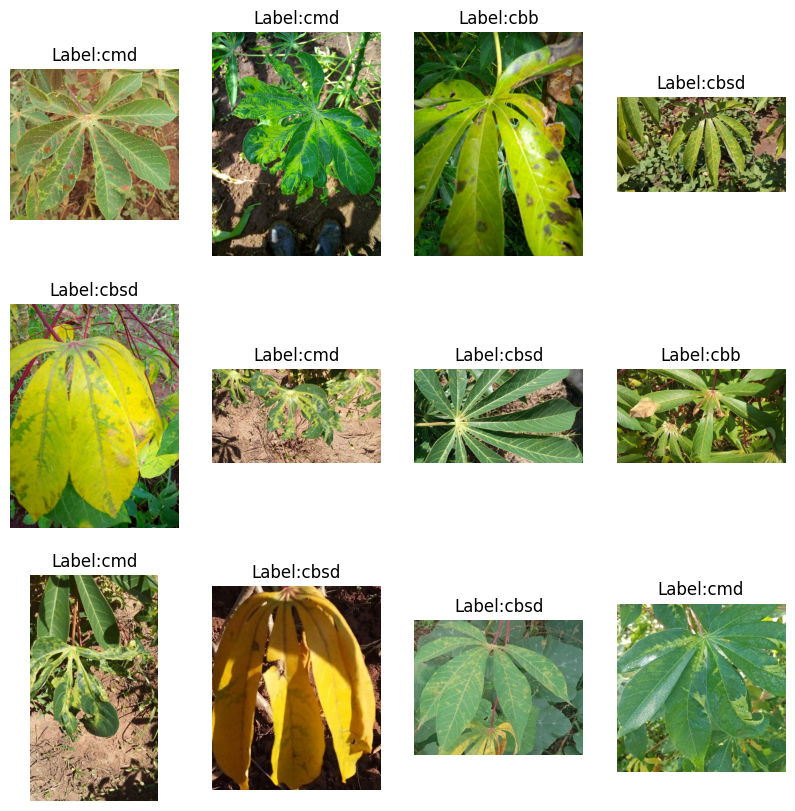

In [7]:
#visualize train dataset
visual_tf_dataset(data=train,
                  class_name=name)

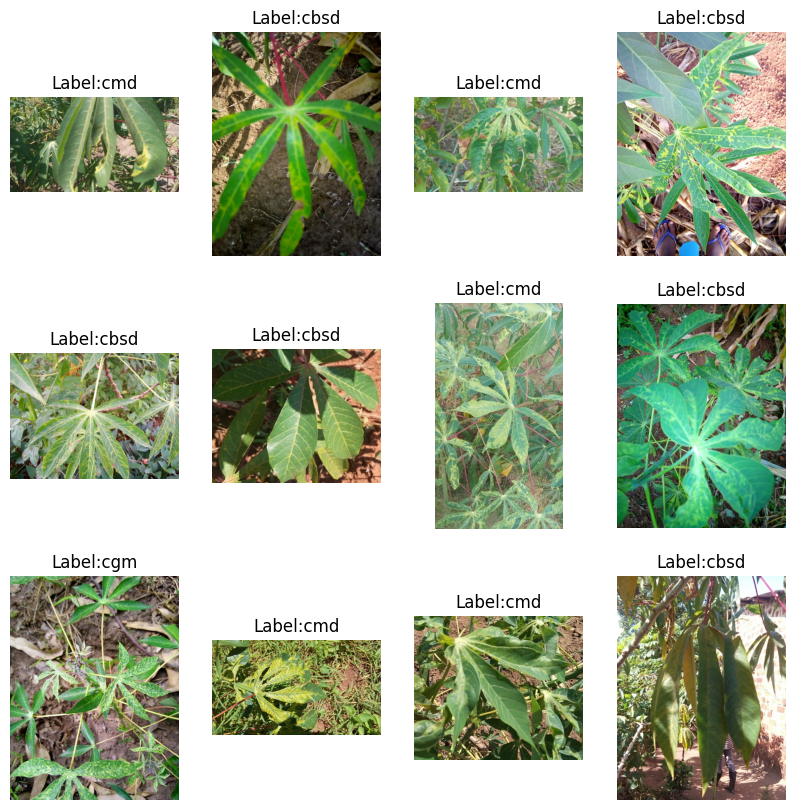

In [8]:
#visualize validation dataset
visual_tf_dataset(data=validation,
                  class_name=name)

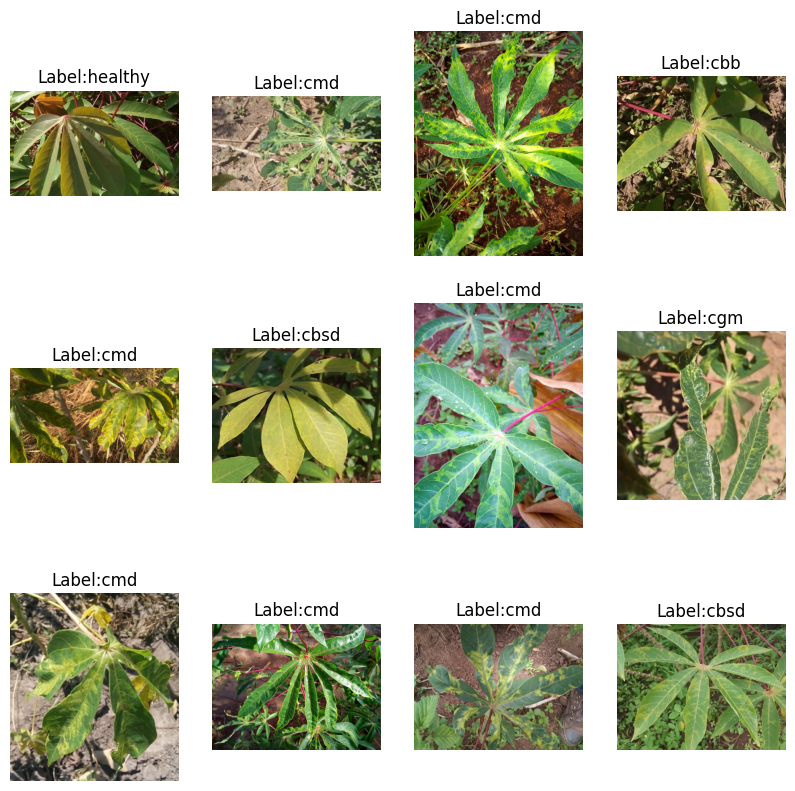

In [9]:
#visualize test dataset
visual_tf_dataset(data=test,
                  class_name=name)

# create data preprocessing function

Cassava Mosaic Disease tf.Tensor(
[[[134  90  63]
  [139  95  68]
  [145 101  74]
  ...
  [162 104 102]
  [154  96  94]
  [151  93  91]]

 [[147 103  76]
  [147 103  76]
  [147 103  76]
  ...
  [162 104 102]
  [160 102 100]
  [157  99  97]]

 [[152 108  81]
  [147 103  76]
  [146 102  75]
  ...
  [159 101  97]
  [165 107 103]
  [165 107 103]]

 ...

 [[105 133  74]
  [104 132  71]
  [102 130  69]
  ...
  [ 29  55   8]
  [ 29  55   8]
  [ 28  54   7]]

 [[ 80 106  45]
  [ 82 108  47]
  [ 97 123  62]
  ...
  [ 30  53   9]
  [ 29  52   8]
  [ 28  51   7]]

 [[ 81 107  46]
  [ 80 106  45]
  [ 89 115  52]
  ...
  [ 30  53   9]
  [ 29  52   8]
  [ 28  51   7]]], shape=(666, 500, 3), dtype=uint8) AxesImage(size=(666, 500))


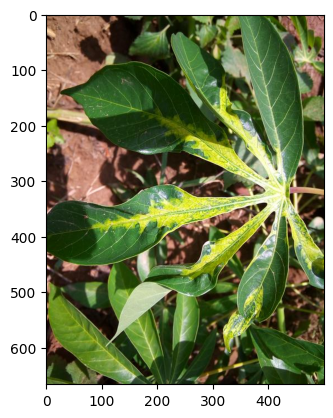

In [10]:
#before preprocessing dataset
for image,label in train.take(1):
  print(name_v[label.numpy()],image,plt.imshow(image))

In [11]:
#preprocessed data
def preprocess_img(image, label, img_shape=224):
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
  image = tf.image.convert_image_dtype(image,dtype=tf.float32) # convert to float 32
  image = image/255 #normalisation
  return image,label

In [12]:
preprocess_img(image, label=name_v[label])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.57594955, 0.4034006 , 0.29751822],
         [0.58652276, 0.4139737 , 0.30809134],
         [0.60506016, 0.43251112, 0.32662877],
         ...,
         [0.65942883, 0.45942885, 0.44766414],
         [0.6355614 , 0.41808933, 0.4069199 ],
         [0.6226189 , 0.39516792, 0.38732478]],
 
        [[0.60898596, 0.43643695, 0.33055457],
         [0.6217484 , 0.44919935, 0.343317  ],
         [0.5291726 , 0.3566236 , 0.25074124],
         ...,
         [0.6687355 , 0.4612075 , 0.44567883],
         [0.6372122 , 0.42033538, 0.392009  ],
         [0.614615  , 0.39098856, 0.36093846]],
 
        [[0.59426194, 0.4217129 , 0.31583056],
         [0.55911255, 0.38656354, 0.28068116],
         [0.6114424 , 0.4388934 , 0.33301103],
         ...,
         [0.70317507, 0.49533194, 0.47964567],
         [0.62778836, 0.40425897, 0.3677743 ],
         [0.8194764 , 0.595947  , 0.5528098 ]],
 
        ...,
 
        [[0.3379634 , 0.43992418

In [13]:
#mapping preprocessing dataset to all dataset
##train dataset
train_data = train.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=len(train_data)).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
#validation data
valid_data = validation.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
valid_data = valid_data.shuffle(buffer_size=len(train_data)).batch(batch_size=32).prefetch(tf.data.AUTOTUNE)
#test data
test_data = test.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

size after preprocessed is (224, 224, 3)


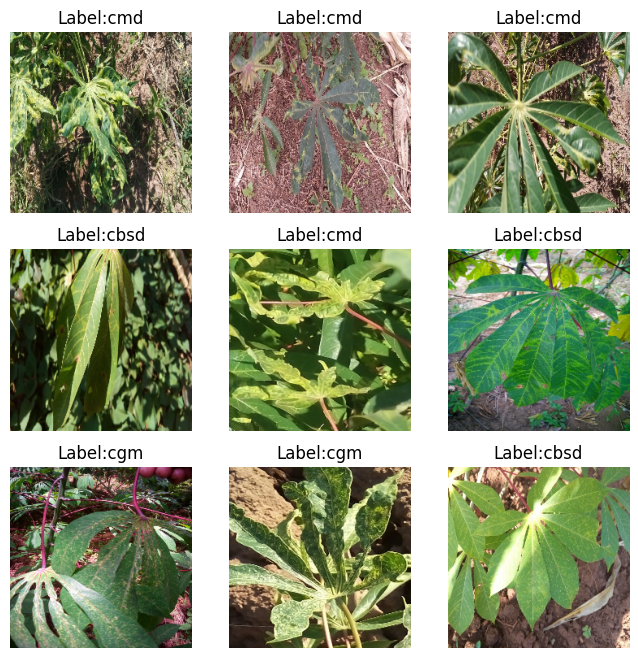

In [14]:
#visualizing process image
visualize_processed_data(data=valid_data,
                         class_name=name)

In [15]:
#set up mix precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('float32')
mixed_precision.global_policy()

<Policy "float32">

In [16]:
data_augmentation = tf.keras.Sequential([
layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
layers.experimental.preprocessing.RandomRotation(0.2, fill_mode = 'constant')])

# Callbacks

In [17]:
#filepath
path = 'Checkpoint/EfficientNetB0'
#setrting up callbacks before training
Early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)
#set up model checkpointing
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=path,
                                                         save_best_only=True,
                                                         save_weights_only=True)


#filepath
path = 'Checkpoint/DenseNet_tune'
#setrting up callbacks before training
Early_stop_tune = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)
#set up model checkpointing
model_checkpoint_tune = tf.keras.callbacks.ModelCheckpoint(filepath=path,
                                                         save_best_only=True,
                                                         save_weights_only=True)


#filepath
path = 'Checkpoint/Hub_model'
#setrting up callbacks before training
Early_stop_hub = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)
#set up model checkpointing
model_checkpoint_hub = tf.keras.callbacks.ModelCheckpoint(filepath=path,
                                                         save_best_only=True,
                                                         save_weights_only=True)

# modelling

In [18]:
#modellimg with EfficientNetB0
Base_model = tf.keras.applications.DenseNet121(include_top=False)
#set trainability to False
Base_model.trainable=False
#set up input
Input = tf.keras.layers.Input(shape=(224,224,3),name='input_shape')
#data_augmentation
###x = data_augmentation(Input)
#Base model
x = Base_model(Input,training=False)
#GlobalAveragePooling2D
x = tf.keras.layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_Layer')(x)
#Dense_Layer
x = tf.keras.layers.Dense(len(name),name='Dense_Layer')(x)
#Activation_layer
Output = tf.keras.layers.Activation(activation='softmax',name='Activation_layer')(x)
#build model
model1 = tf.keras.Model(Input,Output)

29084464/29084464 [==============================] - 0s 0us/step


In [19]:
#model summary
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 GlobalAveragePooling2D_Laye  (None, 1024)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 Dense_Layer (Dense)         (None, 5)                 5125      
                                                                 
 Activation_layer (Activatio  (None, 5)                0         
 n)                                                              
                                                                 
Total params: 7,042,629
Trainable params: 5,125
Non-trainable

In [20]:
#compile the model
model1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [21]:
#fit the model
history_1 = model1.fit(train_data,
            epochs=25,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=int(len(valid_data)*.37),
            callbacks=[create_tensorboard_callback(dir_name='Cassava',experiment_name='EfficientB0'),Early_stop,model_checkpoint])

Saving TensorBoard log files to: Cassava/EfficientB0/20230806-152514
Epoch 1/25
177/177 [==============================] - 62s 143ms/step - loss: 1.0491 - accuracy: 0.6100 - val_loss: 0.8697 - val_accuracy: 0.6804
Epoch 2/25
177/177 [==============================] - 43s 129ms/step - loss: 0.8065 - accuracy: 0.7042 - val_loss: 0.7836 - val_accuracy: 0.7088
Epoch 3/25
177/177 [==============================] - 41s 119ms/step - loss: 0.7305 - accuracy: 0.7413 - val_loss: 0.7494 - val_accuracy: 0.7259
Epoch 4/25
177/177 [==============================] - 41s 123ms/step - loss: 0.6869 - accuracy: 0.7624 - val_loss: 0.6771 - val_accuracy: 0.7741
Epoch 5/25
177/177 [==============================] - 42s 130ms/step - loss: 0.6571 - accuracy: 0.7686 - val_loss: 0.6739 - val_accuracy: 0.7713
Epoch 6/25
177/177 [==============================] - 40s 118ms/step - loss: 0.6381 - accuracy: 0.7786 - val_loss: 0.6544 - val_accuracy: 0.7741
Epoch 7/25
177/177 [==============================] - 42s 125

In [22]:
model1.evaluate(test_data)

59/59 [==============================] - 9s 151ms/step - loss: 0.6645 - accuracy: 0.7576


[0.6645131707191467, 0.7575596570968628]

In [23]:
Base_model.trainable=True

In [24]:
for layer_num,layers in enumerate(Base_model.layers[:-10]):
  layers.trainable = False


In [32]:
for layer_num,layers in enumerate(model1.layers[1].layers):
  print(layer_num,layers.name,layers.trainable)

0 input_1 False
1 zero_padding2d False
2 conv1/conv False
3 conv1/bn False
4 conv1/relu False
5 zero_padding2d_1 False
6 pool1 False
7 conv2_block1_0_bn False
8 conv2_block1_0_relu False
9 conv2_block1_1_conv False
10 conv2_block1_1_bn False
11 conv2_block1_1_relu False
12 conv2_block1_2_conv False
13 conv2_block1_concat False
14 conv2_block2_0_bn False
15 conv2_block2_0_relu False
16 conv2_block2_1_conv False
17 conv2_block2_1_bn False
18 conv2_block2_1_relu False
19 conv2_block2_2_conv False
20 conv2_block2_concat False
21 conv2_block3_0_bn False
22 conv2_block3_0_relu False
23 conv2_block3_1_conv False
24 conv2_block3_1_bn False
25 conv2_block3_1_relu False
26 conv2_block3_2_conv False
27 conv2_block3_concat False
28 conv2_block4_0_bn False
29 conv2_block4_0_relu False
30 conv2_block4_1_conv False
31 conv2_block4_1_bn False
32 conv2_block4_1_relu False
33 conv2_block4_2_conv False
34 conv2_block4_concat False
35 conv2_block5_0_bn False
36 conv2_block5_0_relu False
37 conv2_block5_1_

In [ ]:
model1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=['accuracy'])

In [ ]:
initi = history_1.epoch[-1]
fine_epoch = initi+20

history_2 = model1.fit(train_data,
            epochs=fine_epoch,
            initial_epoch = initi,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=int(len(valid_data)*.35),
            callbacks=[create_tensorboard_callback(dir_name='Cassava',experiment_name='DenseNet_fine_tune'),Early_stop_tune,model_checkpoint_tune])

In [ ]:
model1.evaluate(test_data)

In [ ]:
Predictions = model1.predict(test_data)

In [37]:
Predictions.argmax(axis=1)

array([4, 3, 3, ..., 1, 3, 3])

In [58]:
SHAPE=(224, 224, 3)
url = 'https://tfhub.dev/google/cropnet/classifier/cassava_disease_V1/2'
hub_model = hub.KerasLayer(url,
                            trainable=False,
                            input_shape=SHAPE)
hub_model.trainable = False
Inputs = tf.keras.layers.Input(shape=SHAPE)
|x = data_augmentation(Inputs)
#x = tf.keras.applications.resnet.preprocess_input(x)
x = hub_model(Inputs, training=False)
#x = layers.GlobalAveragePooling2D()(x)
predictions = tf.keras.layers.Dense(5, activation = 'softmax')(x)
model2 = tf.keras.Model(Inputs, predictions)

In [59]:
model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [60]:
history_3 = model2.fit(train_data,
            epochs=25,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data),
            callbacks=[create_tensorboard_callback(dir_name='Cassava',experiment_name='tensorflow_hub_model'),Early_stop_hub,model_checkpoint_hub])

Saving TensorBoard log files to: Cassava/tensorflow_hub_model/20230806-162153
Epoch 1/25
177/177 [==============================] - 50s 110ms/step - loss: 1.7908 - accuracy: 0.0930 - val_loss: 1.6389 - val_accuracy: 0.2324
Epoch 2/25
177/177 [==============================] - 35s 86ms/step - loss: 1.5042 - accuracy: 0.3255 - val_loss: 1.3802 - val_accuracy: 0.6808
Epoch 3/25
177/177 [==============================] - 35s 81ms/step - loss: 1.2731 - accuracy: 0.6864 - val_loss: 1.1735 - val_accuracy: 0.6887
Epoch 4/25
177/177 [==============================] - 35s 85ms/step - loss: 1.0902 - accuracy: 0.7021 - val_loss: 1.0110 - val_accuracy: 0.7147
Epoch 5/25
177/177 [==============================] - 34s 80ms/step - loss: 0.9468 - accuracy: 0.7288 - val_loss: 0.8833 - val_accuracy: 0.7343
Epoch 6/25
177/177 [==============================] - 36s 86ms/step - loss: 0.8336 - accuracy: 0.7528 - val_loss: 0.7817 - val_accuracy: 0.8242
Epoch 7/25
177/177 [==============================] - 35s

In [61]:
model2.evaluate(test_data)

59/59 [==============================] - 8s 138ms/step - loss: 0.4673 - accuracy: 0.8844


[0.4672786593437195, 0.8843501210212708]

In [62]:
Prediction = model2.predict(test_data,verbose=1).argmax(axis=1)
Prediction

59/59 [==============================] - 8s 119ms/step


array([3, 2, 3, ..., 3, 1, 4])

In [ ]:
load_and_prep_image(filename='L1.jpg')

In [69]:
!wget https://th.bing.com/th/id/OIP._xgJLdsIPhlCvKXYtP5HOQHaFk?pid=ImgDet&rs=1

--2023-08-06 16:37:07--  https://th.bing.com/th/id/OIP._xgJLdsIPhlCvKXYtP5HOQHaFk?pid=ImgDet
Resolving th.bing.com (th.bing.com)... 204.79.197.200, 13.107.21.200, 2620:1ec:c11::200
Connecting to th.bing.com (th.bing.com)|204.79.197.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50377 (49K) [image/jpeg]
Saving to: ‘OIP._xgJLdsIPhlCvKXYtP5HOQHaFk?pid=ImgDet’

OIP._xgJLdsIPhlCvKX 100%[===================>]  49.20K  --.-KB/s    in 0.007s  

2023-08-06 16:37:07 (7.04 MB/s) - ‘OIP._xgJLdsIPhlCvKXYtP5HOQHaFk?pid=ImgDet’ saved [50377/50377]



1/1 [==============================] - 1s 997ms/step


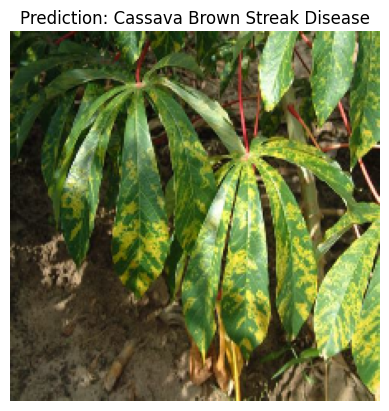

In [70]:
pred_and_plot(model=model2,
              filename='OIP._xgJLdsIPhlCvKXYtP5HOQHaFk?pid=ImgDet',
              class_names=name_v)

In [71]:
!wget https://apps.lucidcentral.org/pppw_v10/images/entities/cassava_brown_streak_disease_439/dsc03920.jpg

--2023-08-06 16:40:56--  https://apps.lucidcentral.org/pppw_v10/images/entities/cassava_brown_streak_disease_439/dsc03920.jpg
Resolving apps.lucidcentral.org (apps.lucidcentral.org)... 104.21.2.26, 172.67.128.157, 2606:4700:3035::6815:21a, ...
Connecting to apps.lucidcentral.org (apps.lucidcentral.org)|104.21.2.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 584561 (571K) [image/jpeg]
Saving to: ‘dsc03920.jpg’

dsc03920.jpg        100%[===================>] 570.86K  2.69MB/s    in 0.2s    

2023-08-06 16:40:57 (2.69 MB/s) - ‘dsc03920.jpg’ saved [584561/584561]



1/1 [==============================] - 0s 28ms/step


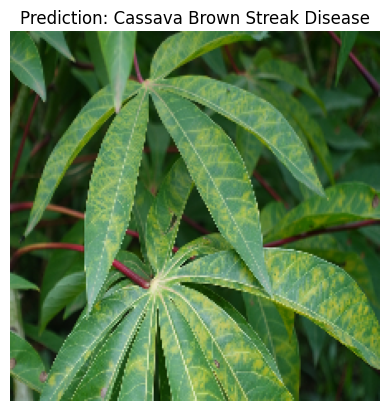

In [72]:
pred_and_plot(model=model2,
              filename='dsc03920.jpg',
              class_names=name_v)

In [79]:
!wget https://thumbs.dreamstime.com/b/cassava-leaf-blight-disease-bacteria-cassava-leaf-blight-disease-bacteria-plant-disease-104127199.jpg

--2023-08-06 16:49:49--  https://thumbs.dreamstime.com/b/cassava-leaf-blight-disease-bacteria-cassava-leaf-blight-disease-bacteria-plant-disease-104127199.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57250 (56K) [image/jpeg]
Saving to: ‘cassava-leaf-blight-disease-bacteria-cassava-leaf-blight-disease-bacteria-plant-disease-104127199.jpg’

cassava-leaf-blight 100%[===================>]  55.91K  --.-KB/s    in 0.008s  

2023-08-06 16:49:50 (7.26 MB/s) - ‘cassava-leaf-blight-disease-bacteria-cassava-leaf-blight-disease-bacteria-plant-disease-104127199.jpg’ saved [57250/57250]



1/1 [==============================] - 0s 35ms/step


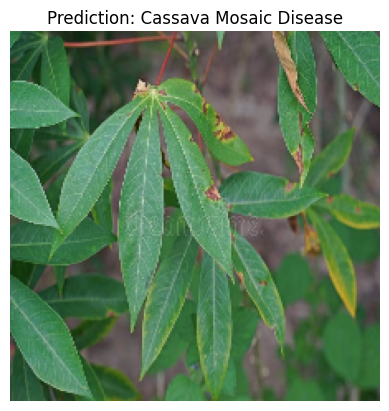

In [84]:
pred_and_plot(model=model1,
              filename='cassava-leaf-blight-disease-bacteria-cassava-leaf-blight-disease-bacteria-plant-disease-104127199.jpg',
              class_names=name_v)

In [67]:
print(name_v)

['Cassava Bacterial Blight', 'Cassava Brown Streak Disease', 'Cassava Greem Mite', 'Cassava Mosaic Disease', 'healthy']
